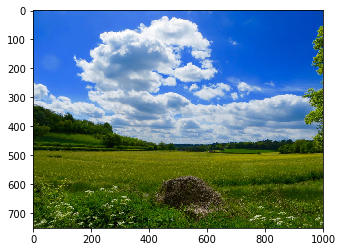

In [37]:
%matplotlib inline
import PIL as PIL
import numpy as np
import matplotlib.pyplot as plt
im = PIL.Image.open('input2.jpeg')
from skimage import filters

im = np.asarray(im)
im_R = im[:,:,0].copy()
im_G = im[:,:,1].copy()
im_B = im[:,:,2].copy()

plt.imshow(im)
plt.show()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

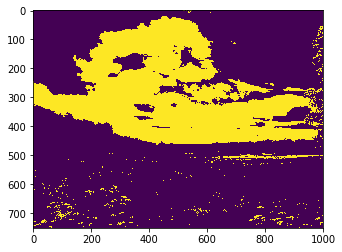

In [38]:
def T_transform(image,T):
    im_transform = np.zeros(image.shape)
    trans_im = np.transpose(image,(2,1,0))
    trans_im = np.reshape(trans_im,(3,im.shape[0]*im.shape[1]))
    im_transform = np.transpose(np.reshape(np.dot(T,trans_im),(3,im.shape[1],im.shape[0])),(2,1,0))
    return im_transform
def CIE_XYZ_transform(im):
    im_norm = im/255.0
    def inv_gamma_fun(a):
        if a<=0.04044:
            return a/12.92
        else:
            return np.power((a+0.055)/(1+0.055),2.4)
    def gamma_fun(a):
        if a<=0.00313:
            return a*12.92
        else:
            return (1+0.055)*np.power(a,1/2.4)-0.055
    im_norm[im_norm<=0.04044] = im_norm[im_norm<=0.04044]/12.93
    im_norm[im_norm>=0.04044] = np.power((im_norm[im_norm>=0.04044]+0.055)/(1+0.055),2.4)

    return T_transform(im_norm,P)
def CIE_XYZ_invtransform(im):
    P = np.array([[0.4124,0.3576,0.1805],
              [0.2126,0.7152,0.0722],
              [0.0193,0.1192,0.9505]])
    P_inv = np.linalg.inv(P)
    im_liRGB = T_transform(im,P_inv)
    mask_a = im_liRGB<=0.00313
    mask_b = im_liRGB>0.00313
    im_liRGB[mask_a] = im_liRGB[mask_a]*12.92
    im_liRGB[mask_b] = (1+0.055)*np.power(im_liRGB[mask_b],1/2.4)-0.055
    return (im_liRGB*255.0).astype(np.uint8)





val = filters.threshold_otsu(im[:,:,1])

mask = im[:,:,1] < val
plt.imshow(~mask)
mask

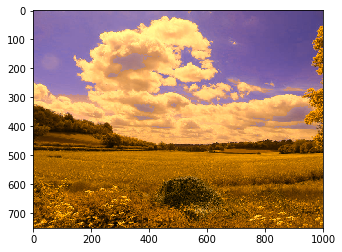

In [48]:
def photoshop_color_mixer(im,mode,adjust_RGB,constant):
    new_im = im[:,:,0]*adjust_RGB[0]+im[:,:,1]*adjust_RGB[1]+im[:,:,2]*adjust_RGB[2]+255.0*constant
    new_im[new_im>255.0] = 255.0
    new_im[new_im<0.0] = 0.0
    return new_im.astype(np.uint8)

im_copy = im.copy()
im_copy[:,:,2] = photoshop_color_mixer(im,2,np.array([0.0,0.0,1]),-0.2)
im_select = photoshop_color_mixer(im_copy,2,np.array([0.0,0.0,1]),-0.2)
im_blue_mask = im_copy[:,:,2]
im_blue_mask[~mask] = im_select[~mask]
im_copy[:,:,2] = im_blue_mask
im_copy[:,:,0] = photoshop_color_mixer(im_copy,0,np.array([-0.40,2,-0.4]),0.0)
plt.imshow(im_copy)
plt.show()

<IPython.core.display.Javascript object>


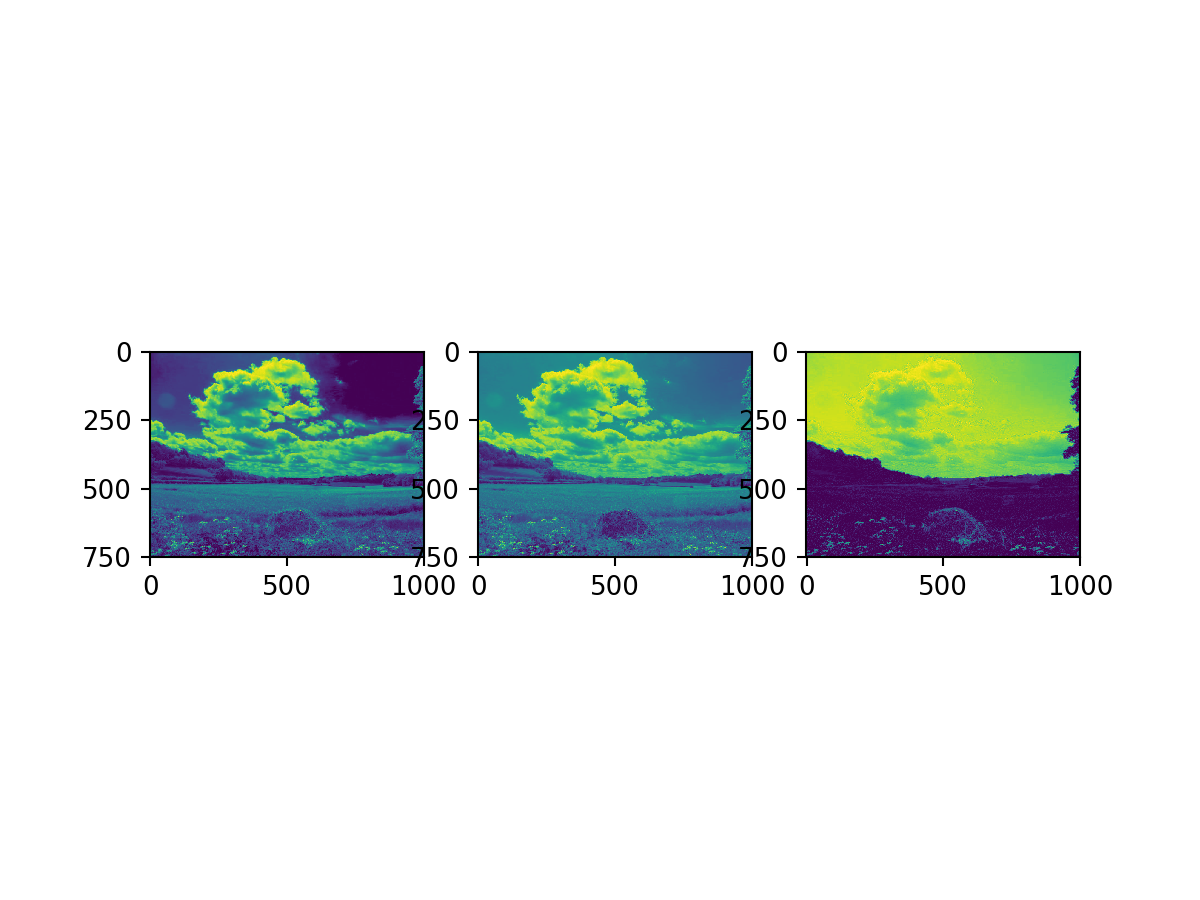

In [4]:
im_R = im[:,:,0].copy()
im_G = im[:,:,1].copy()
im_B = im[:,:,2].copy()
f, ax= plt.subplots(1, 3)
ax[0].imshow(im_R)
ax[1].imshow(im_G)
ax[2].imshow(im_B)
f.show()